<a href="https://colab.research.google.com/github/ucfilho/Doubts_Students/blob/master/sorgo_ANN_dez_21_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d
from sklearn.preprocessing import StandardScaler
from google.colab import files
from sklearn.model_selection import train_test_split

In [ ]:
uploaded = files.upload()

Saving sorgopontanegra.csv to sorgopontanegra (4).csv


In [ ]:
DAT=pd.read_csv("sorgopontanegra.csv")
print(DAT.head())

   Run       SO    IN       GL       Et       Fi       PD        ST         Y1
0    1   35.000  15.0  22.0752  39.9938  27.9171  55.5470   27.0752  79.826230
1    2   35.000  45.0  22.7325  47.5129  31.0542  65.9902   25.7325  99.782441
2    3  165.000  15.0  79.9777  33.2913  45.5551  46.2379   99.9777  84.833595
3    4  165.000  45.0  80.0889  39.5216  48.9236  54.8911  102.0889  98.627059
4    5   25.445  30.0  16.1789  47.5580  30.0440  66.0528   19.1789  97.422376


In [ ]:
Col_Indep=['SO','IN']
names =[ 'Et']

In [ ]:
nrows, ncols = DAT.shape
itrain, itest =train_test_split(range(nrows), test_size=0.2,random_state=11) # 2,3,4,5,6,7,8,9,10,11,22

In [ ]:
# separa as colunas de interesse
cols = len(Col_Indep)
Index=range(1,cols+1)
Dat_Select=[]
x_train=DAT.iloc[itrain,Index].copy()
y_train=DAT.iloc[itrain,-1].copy()
x_test = DAT.iloc[itest,Index].copy()
y_test = DAT.iloc[itest,-1].copy()

In [ ]:
scaler_x = StandardScaler().fit(DAT.iloc[:,Index])
scaler_y = StandardScaler().fit(np.array(DAT.iloc[:,-1]).reshape(-1,1))

In [ ]:
x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)
y_train = scaler_y.transform(np.array(y_train).reshape(-1, 1))
y_test = scaler_y.transform(np.array(y_test).reshape(-1, 1))

In [ ]:
x_train

array([[ 1.61324642,  0.024346  ],
       [-1.20778379,  0.024346  ],
       [-1.02694488,  1.21121361],
       [ 1.43344844, -1.1625216 ],
       [-1.20778379, -1.47901963],
       [ 0.20325178,  0.024346  ],
       [ 0.20325178,  1.38528752],
       [-1.02694488,  1.21121361],
       [-1.02694488, -1.1625216 ],
       [ 0.20325178,  0.024346  ]])

In [ ]:
# define a rede neural 
def optmANN(x_train,x_test,y_train,y_test):
  resp_scored = []
  for i in range(1,10):
    r_calc =[]
    N_Hidden = i
    clf = MLPRegressor(solver='lbfgs',activation='tanh',
                      alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                        random_state=1)
    clf.fit(x_train, y_train)
    y_calc_train=clf.predict(x_train)
    y_calc_test=clf.predict(x_test)
    y_calc_train=pd.DataFrame(y_calc_train)
    y_calc_test=pd.DataFrame(y_calc_test)
    r2_test= r2_score(y_test,y_calc_test)
    r2_train = r2_score(y_train,y_calc_train)
    r_calc.append(i)
    r_calc.append(r2_train)
    r_calc.append(r2_test)
    resp_scored.append(r_calc)

  df = pd.DataFrame(resp_scored,columns=['hidden','r2 train','r2 test'])
  return df

In [ ]:
df = optmANN(x_train,x_test,y_train,y_test)
df

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

,hidden,r2 train,r2 test
0,1,0.500091,-1.526942
1,2,0.790940,0.016447
2,3,0.793791,0.921422
3,4,0.795019,-18.047204
4,5,0.795019,-8.284893
5,6,0.794922,-2.280074
6,7,0.795019,-44.893154
7,8,0.795019,-5.672135
8,9,0.795019,-48.118992


In [ ]:
# define a rede neural 
N_Hidden= 3
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                    random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=3,
             random_state=1, solver='lbfgs')

In [ ]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [ ]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)

In [ ]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=scaler_y.inverse_transform(y_calc_train)
y_calc_test=scaler_y.inverse_transform(y_calc_test)
y_test=scaler_y.inverse_transform(y_test)
y_train=scaler_y.inverse_transform(y_train)

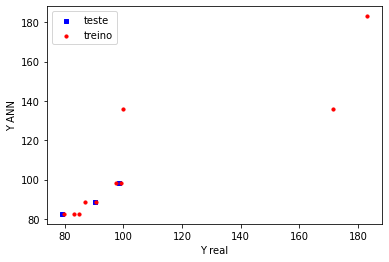

In [ ]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Y ANN')
plt.xlabel('Y real')
plt.show()

In [ ]:
r2_test= r2_score(y_test,y_calc_test)
r2_train = r2_score(y_train,y_calc_train)
print('r2 (train)=',r2_train)
print('r2 (test)=',r2_test)

r2 (train)= 0.7937911318186505
r2 (test)= 0.9214219944708713


In [ ]:
y_calc_train

array([[ 82.59310105],
       [ 98.38372257],
       [135.71267946],
       [ 82.59214266],
       [183.04023674],
       [ 88.74725503],
       [ 98.16882736],
       [135.71267946],
       [ 82.68538365],
       [ 88.74725503]])

In [ ]:
y_train

array([[ 83.22667582],
       [ 97.42237624],
       [171.6375654 ],
       [ 84.833595  ],
       [183.0462616 ],
       [ 90.709563  ],
       [ 99.16007418],
       [ 99.78244101],
       [ 79.82623045],
       [ 86.75705952]])

In [ ]:
DAT

,Run,SO,IN,GL,Et,Fi,PD,ST,Y1
0,1,35.000,15.0,22.0752,39.9938,27.9171,55.547000,27.0752,79.826230
1,2,35.000,45.0,22.7325,47.5129,31.0542,65.990200,25.7325,99.782441
2,3,165.000,15.0,79.9777,33.2913,45.5551,46.237900,99.9777,84.833595
3,4,165.000,45.0,80.0889,39.5216,48.9236,54.891100,102.0889,98.627059
4,5,25.445,30.0,16.1789,47.5580,30.0440,66.052800,19.1789,97.422376
5,6,174.500,30.0,109.2821,33.7567,45.9617,46.884300,109.2821,83.226676
6,7,100.000,12.8,49.8091,33.2313,41.6670,46.154600,64.8091,79.171252
7,8,100.000,47.2,55.3959,38.5110,43.7050,53.487500,59.9659,99.160074
8,9,100.000,30.0,53.9595,34.8771,44.7440,48.440400,59.5295,90.461489
9,10,100.000,30.0,56.2054,34.7108,42.7861,48.209400,61.7754,86.757060


In [ ]:
def function(x, clf=clf):
  n = len(x)
  x=x.reshape((1, n))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [ ]:
nrows,ncols= x_train.shape
bounds = [(-1,1)]*ncols
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)


In [ ]:
n = len(bounds)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, n))
print(Condicoes)
resp = pd.DataFrame(scaler_x.inverse_transform(Condicoes),columns=Col_Indep)
print(resp)
Y=clf.predict(Condicoes)
Y = scaler_y.inverse_transform(Y.reshape(-1,1))
print(Y)

     0    1
0 -1.0  1.0
          SO         IN
0  36.423703  42.330616
[[103.77065581]]


In [ ]:
# separa as colunas de interesse
x_train=DAT[Col_Indep]
y_train=DAT[names]

In [ ]:
x_train = scaler_x.transform(x_train)
y_train = scaler_y.transform(np.array(y_train).reshape(-1, 1))

In [ ]:
df = optmANN(x_train,x_train,y_train,y_train)
df

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

,hidden,r2 train,r2 test
0,1,0.923705,0.923705
1,2,0.801943,0.801943
2,3,0.984661,0.984661
3,4,0.995104,0.995104
4,5,0.995780,0.995780
5,6,0.991970,0.991970
6,7,0.995711,0.995711
7,8,0.995455,0.995455
8,9,0.995610,0.995610


In [ ]:
# define a rede neural 
N_Hidden= 3
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                    random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=3,
             random_state=1, solver='lbfgs')

In [ ]:
def function(x, clf=clf):
  n = len(x)
  x=x.reshape((1, n))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [ ]:
nrows,ncols= x_train.shape
bounds = [(-1,1)]*ncols
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)

In [ ]:
n = len(bounds)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, n))
print(Condicoes)
resp = pd.DataFrame(scaler_x.inverse_transform(Condicoes),columns=Col_Indep)
print(resp)
Y=clf.predict(Condicoes)
Y = scaler_y.inverse_transform(Y.reshape(-1,1))
print(Y)

     0    1
0 -1.0  1.0
          SO         IN
0  36.423689  42.330617
[[46.14981507]]
